In [1]:
!https://github.com/Jamunaselvam18/CVIP-projects/blob/main/phase1/Time%20series.ipynb

/bin/bash: line 1: https://github.com/Jamunaselvam18/CVIP-projects/blob/main/phase1/Time%20series.ipynb: No such file or directory


In [2]:
!kaggle datasets download -d twinkle0705/state-wise-power-consumption-in-india

Dataset URL: https://www.kaggle.com/datasets/twinkle0705/state-wise-power-consumption-in-india
License(s): CC0-1.0
  0% 0.00/123k [00:00<?, ?B/s]
100% 123k/123k [00:00<00:00, 23.0MB/s]


In [3]:
!unzip state-wise-power-consumption-in-india.zip

Archive:  state-wise-power-consumption-in-india.zip
  inflating: dataset_tk.csv          
  inflating: long_data_.csv          


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('long_data_.csv')
data["Dates"]=pd.to_datetime(data.index,errors="coerce")
data.set_index("Dates",inplace=True)

In [6]:
data.head()

,States,Regions,latitude,longitude,Usage
Dates,,,,,
1970-01-01 00:00:00.000000000,Punjab,NR,31.519974,75.980003,119.9
1970-01-01 00:00:00.000000001,Haryana,NR,28.450006,77.019991,130.3
1970-01-01 00:00:00.000000002,Rajasthan,NR,26.449999,74.639981,234.1
1970-01-01 00:00:00.000000003,Delhi,NR,28.669993,77.230004,85.8
1970-01-01 00:00:00.000000004,UP,NR,27.599981,78.050006,313.9


In [7]:
data.shape

(16599, 5)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16599 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000016598
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Usage      16599 non-null  float64
dtypes: float64(3), object(2)
memory usage: 778.1+ KB


In [9]:
data.columns

Index(['States', 'Regions', 'latitude', 'longitude', 'Usage'], dtype='object')

In [10]:
data.isna().sum()

,0
States,0
Regions,0
latitude,0
longitude,0
Usage,0


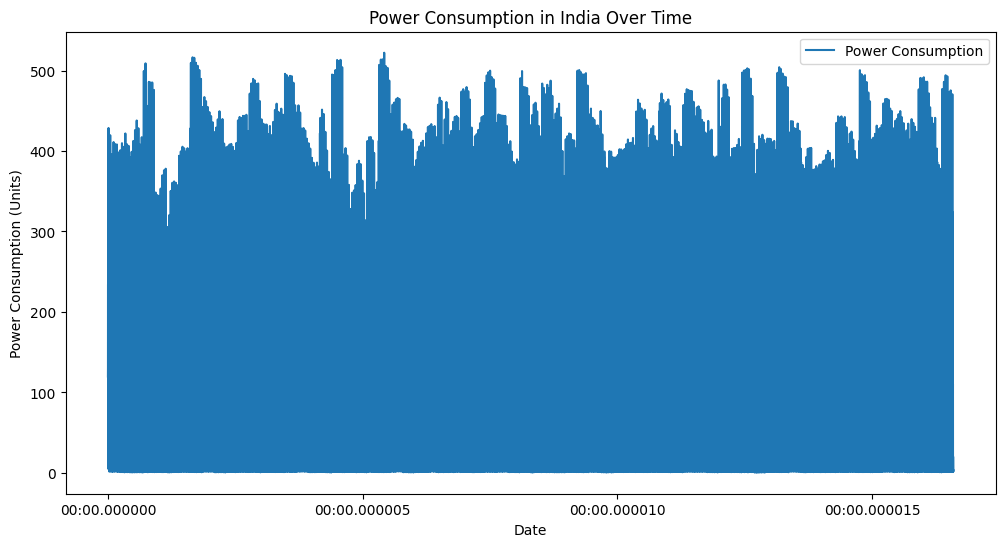

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Usage'], label='Power Consumption')
plt.title('Power Consumption in India Over Time',color="Black")
plt.xlabel('Date')
plt.ylabel('Power Consumption (Units)')
plt.legend()
# plt.grid(True)
plt.show()

#Time series Analysis:-

In [12]:
# @title import libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

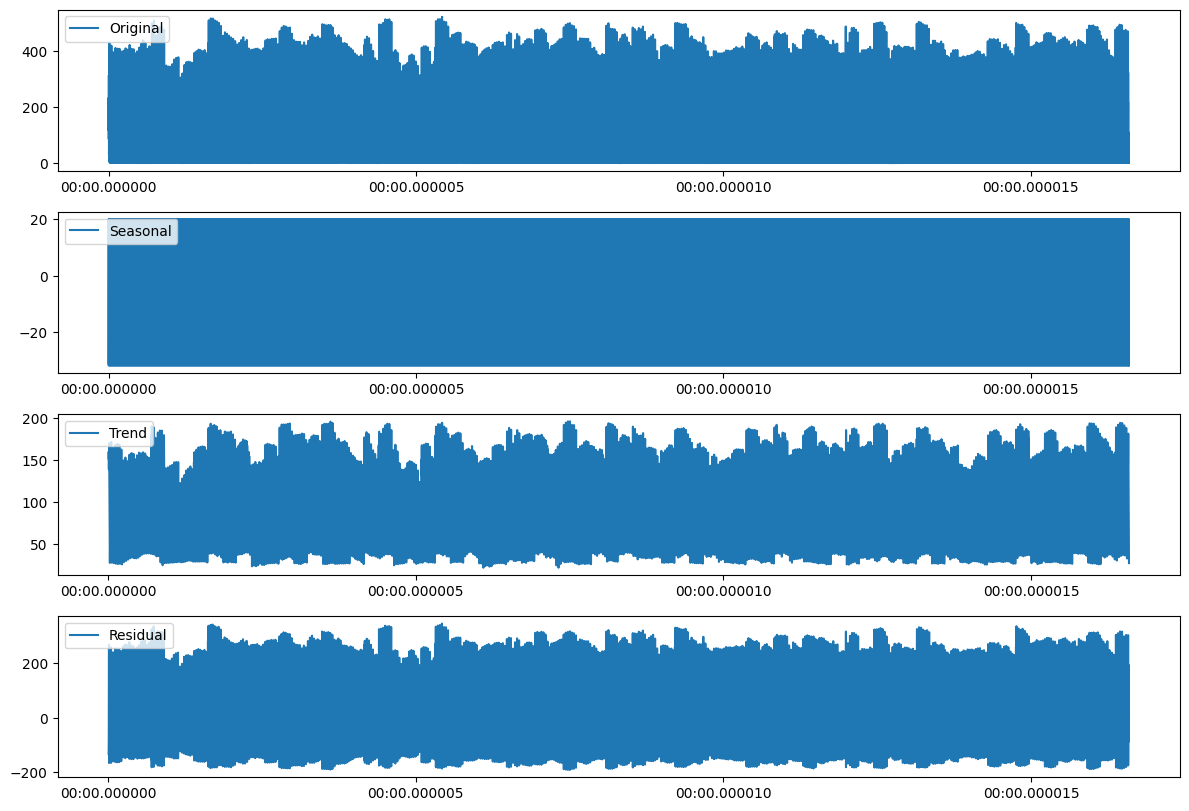

In [22]:
decomposition=sd(data["Usage"],model="additive",period=12)
plt.figure(figsize=(12,10))
plt.subplot(511)
plt.plot(data["Usage"],label="Original")
plt.legend(loc="best")
plt.subplot(512)
plt.plot(decomposition.seasonal,label="Seasonal")
plt.legend(loc="upper left")
plt.subplot(513)
plt.plot(decomposition.trend,label="Trend")
plt.legend(loc="upper left")
plt.subplot(514)
plt.plot(decomposition.resid,label="Residual")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#Statistical Analysis

In [23]:
#perform ADF test to find it is stationary for the model
adf_test=adfuller(data["Usage"])
print(f"p-value: {adf_test[1]}")
print(f"ADF Statistic: {adf_test[0]}")
if adf_test[1]>0.05:
  print("The series is non-stationary")
else:
  print("The series is stationary")

p-value: 2.364620267150845e-07
ADF Statistic: -5.9323232995331665
The series is stationary


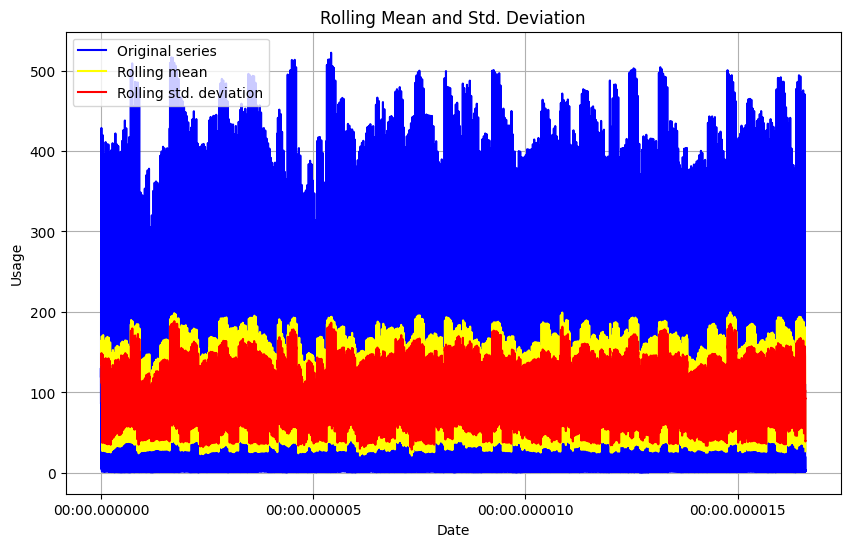

In [25]:
#rolling mean and std used  to smooth out data and track the changing trends and volatility over time.
rolling_mean = data['Usage'].rolling(12).mean()
rolling_std = data['Usage'].rolling(12).std()

plt.figure(figsize=(10, 6))
plt.plot(data['Usage'], color='blue', label='Original series')
plt.plot(rolling_mean, color='yellow', label='Rolling mean')
plt.plot(rolling_std, color='red', label='Rolling std. deviation')

plt.legend(loc='best')
plt.title('Rolling Mean and Std. Deviation')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

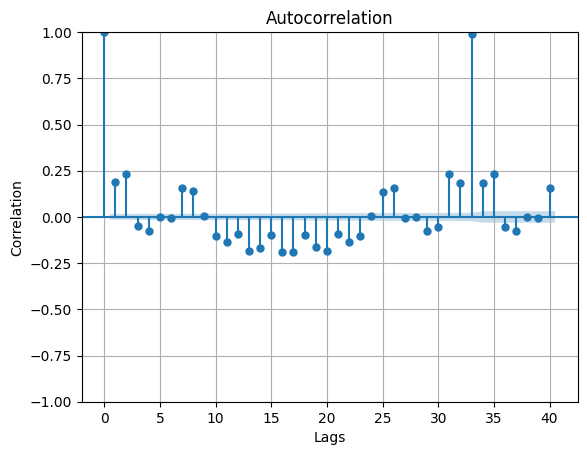

In [26]:
# @title autocorrelation
plt.figure(figsize=(12,6))
plot_acf(data["Usage"],lags=40,alpha=0.05)#lags= number of time steps (or periods), number of time steps (or periods)
plt.title("Autocorrelation")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

#Resampling data

In [40]:
# @title Daily
daily_mean_usage=data["Usage"].resample('D').mean()#Daily variation in stock prices

print("Daily Variation in Usage:")
print(daily_mean_usage)

Daily Variation in Usage:
Dates
1970-01-01    103.001862
Freq: D, Name: Usage, dtype: float64


In [41]:
# @title weekly
weekly_mean_usage=data["Usage"].resample('W').mean()#weekly variation in stock prices

print("Weekly Variation in Usage:")
print(weekly_mean_usage.head())


Weekly Variation in Usage:
Dates
1970-01-04    103.001862
Freq: W-SUN, Name: Usage, dtype: float64


In [42]:
# @title Monthly
monthly_mean_usage = data['Usage'].resample('M').mean()#monthly variation in stock prices

print('Monthly Variation in Usage:')
print(monthly_mean_usage.head())

Monthly Variation in Usage:
Dates
1970-01-31    103.001862
Freq: M, Name: Usage, dtype: float64


#Modeling(ARIMA)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


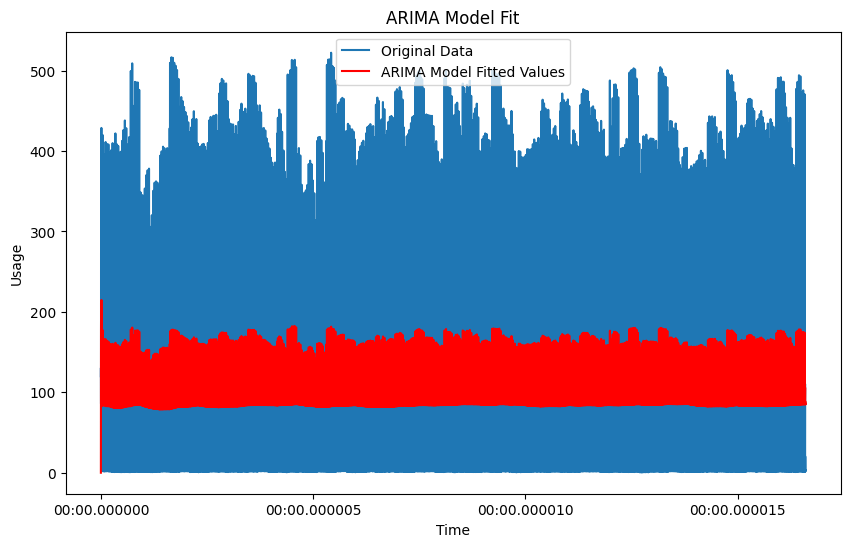

In [44]:
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

model = ARIMA(data['Usage'], order=(p, d, q))
fit_model = model.fit()

# Visualize the ARIMA model fit
plt.figure(figsize=(10, 6))
plt.plot(data['Usage'], label='Original Data')
plt.plot(fit_model.fittedvalues, label='ARIMA Model Fitted Values', color='red')
plt.title('ARIMA Model Fit')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()

In [45]:
model_summary = fit_model.summary()
# Print the summary
print(model_summary)

                               SARIMAX Results                                
Dep. Variable:                  Usage   No. Observations:                16599
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -102160.494
Date:                Thu, 05 Sep 2024   AIC                         204326.988
Time:                        16:55:57   BIC                         204350.140
Sample:                    01-01-1970   HQIC                        204334.632
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1896      0.007     26.001      0.000       0.175       0.204
ma.L1         -0.9995      0.001  -1849.065      0.000      -1.001      -0.998
sigma2      1.298e+04    125.570    103.405      0.0